In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

load data

In [3]:
# source_name = 'qu_solar_PV_Power00-19.csv'
d1 = pd.read_csv('result_df/preva_econ.csv', index_col=0)  # Total final energy consumption (TFEC) (TJ)
d2 = pd.read_csv('result_df/preva_eprod.csv', index_col=0) # Total electricity output (GWh)
df = pd.merge(d1, d2)

In [4]:
df

,Country,Years,Total final energy consumption (TFEC) (TJ) [1.1_TOTAL.FINAL.ENERGY.CONSUM],Total electricity output (GWh) [4.1.1_TOTAL.ELECTRICITY.OUTPUT]
0,China,2000,30187188.73,1355738
1,China,2001,30940867.04,1480949
2,China,2002,32272543.97,1654164
3,China,2003,35505254.39,1910755
4,China,2004,41469975.08,2203502
...,...,...,...,...
59,United States,2011,57123701.65,4326635
60,United States,2012,56628804.85,4270884
61,United States,2013,57984073.56,4287114
62,United States,2014,59116385.16,4319156


In [6]:
df['Years'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015])

In [7]:
df['Country'].unique()

array(['China', 'Germany', 'India', 'United States'], dtype=object)

In [17]:
df=df.rename(columns={'Total final energy consumption (TFEC) (TJ) [1.1_TOTAL.FINAL.ENERGY.CONSUM]':'Total final energy consumption (TFEC) (TJ)'})
df=df.rename(columns={'Total electricity output (GWh) [4.1.1_TOTAL.ELECTRICITY.OUTPUT]':'Total electricity output (GWh)'})

build plots for the countries we research

In [20]:
df.columns

Index(['Country', 'Years', 'Total final energy consumption (TFEC) (TJ)',
       'Total electricity output (GWh)'],
      dtype='object')

In [43]:
dfg = df.groupby('Years').mean()
dfg = dfg.reset_index()

In [44]:
dfg['Years']

0     2000
1     2001
2     2002
3     2003
4     2004
5     2005
6     2006
7     2007
8     2008
9     2009
10    2010
11    2011
12    2012
13    2013
14    2014
15    2015
Name: Years, dtype: int64

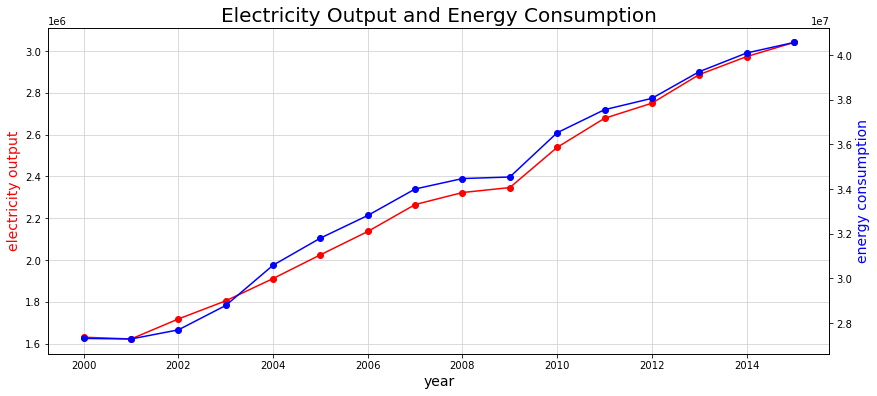

In [58]:

# create figure and axis objects with subplots()
fig,ax = plt.pyplot.subplots(1,1, figsize=(14,6))
ax.grid(color='lightgrey')

# make a plot
ax.plot(dfg['Years'], dfg['Total electricity output (GWh)'], color="red", marker="o")
# set x-axis label
ax.set_xlabel("year",fontsize=14)
# set y-axis label
ax.set_ylabel("electricity output",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(dfg['Years'], dfg['Total final energy consumption (TFEC) (TJ)'],color="blue",marker="o")
ax2.set_ylabel("energy consumption",color="blue",fontsize=14)
ax.set_title('Electricity Output and Energy Consumption', size = 20)

plt.pyplot.show()

# save the plot as a file
fig.savefig('Electricity Output and Energy Consumption.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')